In [64]:
import matplotlib.pyplot as plt
import numpy as np
import control
import matplotlib.pyplot as plt

In [65]:
V = 1
J = 2  # Momento de inércia
b = 0.5  # Coeficiente de atrito viscoso
Lf = 1e-3  # Indutância da armadura
Rf = .4  # Resistência da armadura
Ke = 0.0274  # Constante eletromotriz
Km = 10  # Constante de torque
Td = 0 # Disturbio

s = control.tf('s') # Variável que permite a escrita algebrica das funções de transferencia

t = np.linspace(0, 10, 10000) # Vetor tempo usado para a entrada dos sistemas

# Questão 1 (Motor controlado pelo campo)

In [66]:
modelo_eletrico = 1 / (Lf * s + Rf)
modelo_mecanico = 1 / (J * s + b)
modelo_velocidade = ((Km * modelo_eletrico) + Td) * modelo_mecanico
modelo_posicao = modelo_velocidade * (1/s)

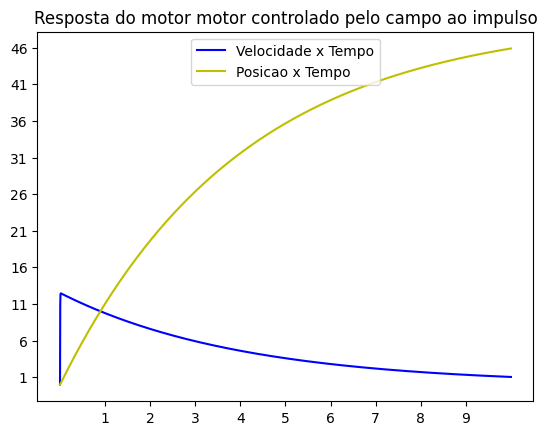

In [67]:
# Plotando a resposta ao impulso do motor
_, y_velocidade = control.impulse_response(modelo_velocidade, t)
_, y_posicao = control.impulse_response(modelo_posicao, t)


plt.xticks(range(1, 10))
plt.yticks(range(1, 50, 5))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado pelo campo ao impulso')
plt.legend(loc = 'upper center')
plt.show()

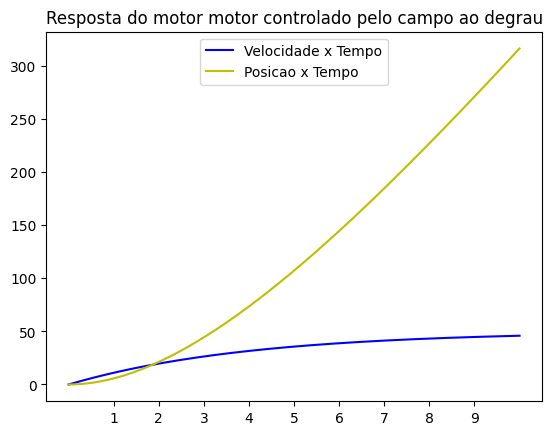

In [68]:
# Plotando a resposta ao degrau do motor
_, y_velocidade = control.step_response(modelo_velocidade, t)
_, y_posicao = control.step_response(modelo_posicao, t)


plt.xticks(range(1, 10))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado pelo campo ao degrau')
plt.legend(loc = 'upper center')
plt.show()

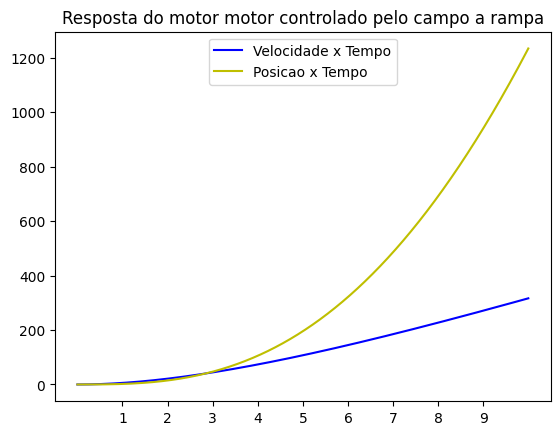

In [69]:
# Plotando a resposta a rampa do motor
_, y_velocidade = control.forced_response(modelo_velocidade, t, t)
_, y_posicao = control.forced_response(modelo_posicao, t, t)


plt.xticks(range(1, 10))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado pelo campo a rampa')
plt.legend(loc = 'upper center')
plt.show()

# Questão 1 (Motor controlado pela armadura)

In [70]:
modelo_eletrico = 1 / (Lf * s + Rf)
modelo_mecanico = 1 / (J * s + b)

modelo_velocidade = ((modelo_eletrico * Km) + Td) * modelo_mecanico
modelo_velocidade = control.feedback(modelo_velocidade, Ke) ## Aplicando retroalimentação

modelo_posicao = modelo_velocidade * (1/s)

# Valores de tempo de 0 a 10s
t = np.linspace(0, 10, 10000)

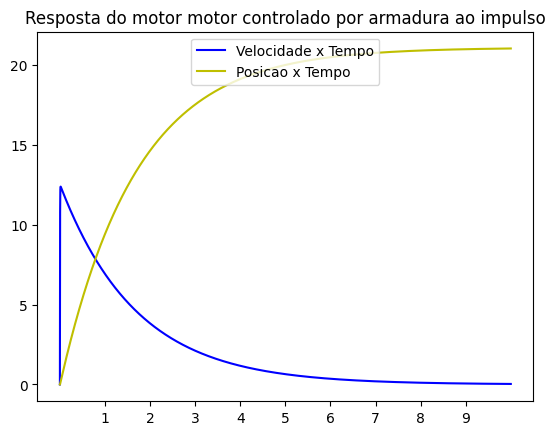

In [71]:
# Plotando a resposta ao impulso do motor
_, y_velocidade = control.impulse_response(modelo_velocidade, t)
_, y_posicao = control.impulse_response(modelo_posicao, t)


plt.xticks(range(1, 10))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado por armadura ao impulso')
plt.legend(loc = 'upper center')
plt.show()

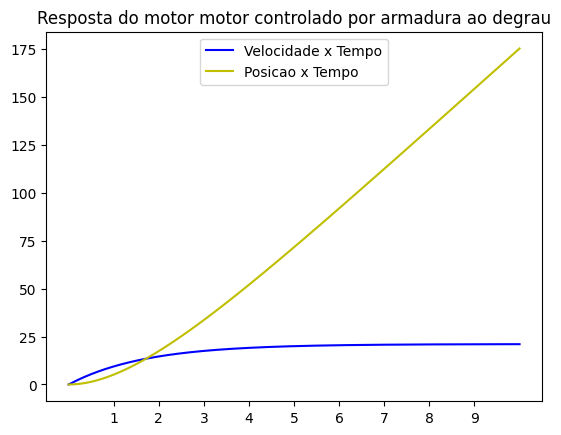

In [72]:
_, y_velocidade = control.step_response(modelo_velocidade, t)
_, y_posicao = control.step_response(modelo_posicao, t)

plt.xticks(range(1, 10))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado por armadura ao degrau')
plt.legend(loc = 'upper center')
plt.show()

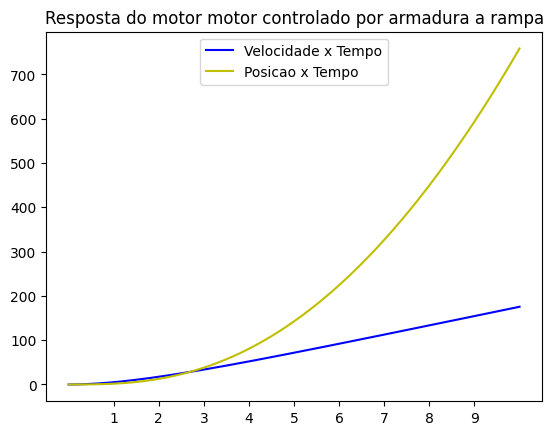

In [73]:
_, y_velocidade = control.forced_response(modelo_velocidade, t, t)
_, y_posicao = control.forced_response(modelo_posicao, t, t)

plt.xticks(range(1, 10))
plt.plot(t, y_velocidade, 'b-', label="Velocidade x Tempo")
plt.plot(t, y_posicao, 'y-', label="Posicao x Tempo")

plt.title('Resposta do motor motor controlado por armadura a rampa')
plt.legend(loc = 'upper center')
plt.show()